In [33]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
# noinspection PyUnresolvedReferences
from tensorflow.keras import layers
from keras.layers import Dense
from keras.utils import to_categorical
from keras import backend as K
import tensorflow as tf

In [34]:
tf.print(tf.__version__)

2.9.2


In [3]:
with open('present.pkl', 'rb') as f:
    encrypted_present = pickle.load(f)

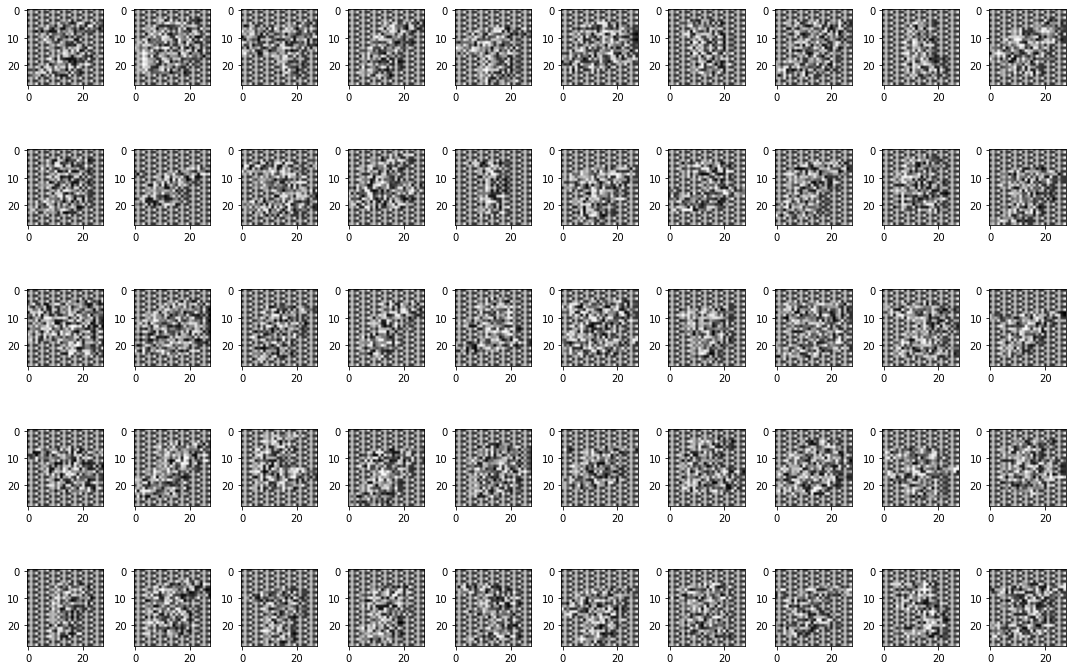

In [4]:
#Plotting Present Encrypted Dataset

num_row = 5
num_col = 10
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for i in range(50):
    ax1 = axes1[i // num_col, i % num_col]
    ax1.imshow(encrypted_present[i], cmap='gray')
plt.tight_layout()
plt.show()

In [5]:
#Opening speck dataset

with open('speck.pkl', 'rb') as f:
    encrypted_speck = pickle.load(f)

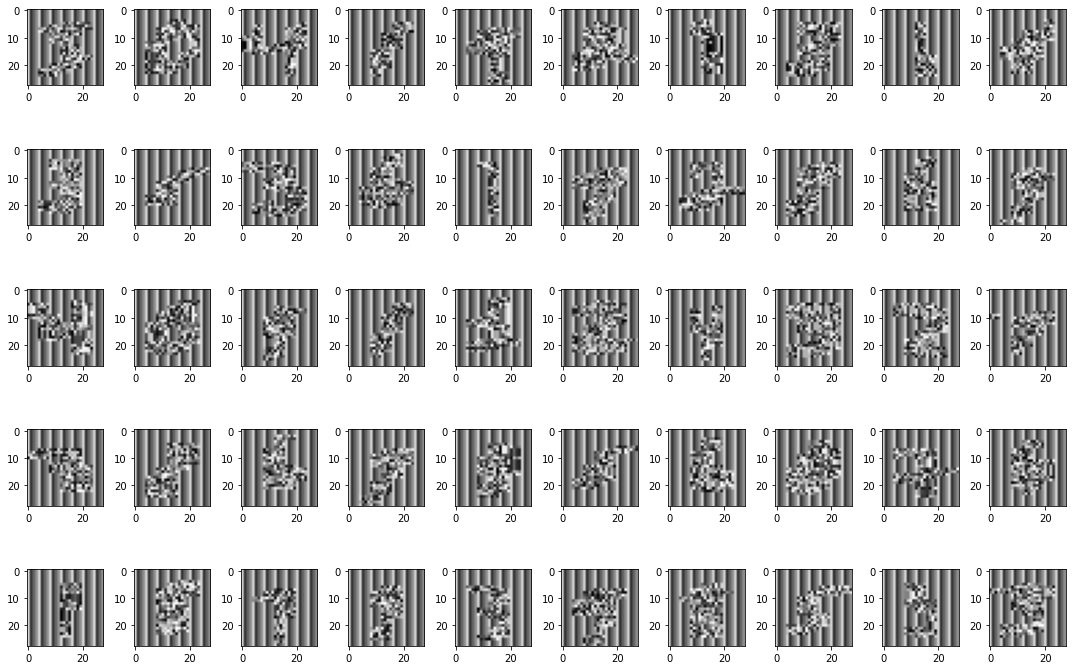

In [6]:
#Plotting Speck Encrypted Dataset

num_row = 5
num_col = 10
# plot images
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for i in range(50):
    ax2 = axes2[i // num_col, i % num_col]
    ax2.imshow(encrypted_speck[i], cmap='gray')
plt.tight_layout()
plt.show()

In [7]:
#Creates y with value 0 for present
y = []
for i in range(len(encrypted_present)):
    y.append(0)

In [8]:
#Creates y with value 1 for speck

for i in range(len(encrypted_speck)):
    y.append(1)

In [9]:
#creates x with present and speck.
x = np.concatenate((encrypted_present, encrypted_speck))

In [10]:
#reshape x
trainX = x.reshape((x.shape[0], 28, 28, 1))

In [11]:
#normalize x to (0 - 1)
train_norm = trainX.astype('float32')
train_norm = train_norm / 255.0

In [12]:
#convert y to categorical
#one hot encode target values
trainY = to_categorical(y)

In [13]:
#We get a final accuracy of ~0.95

In [14]:
#Validating using test dataset generated separately
with open('present_test.pkl', 'rb') as f:
    encrypted_present_test = pickle.load(f)

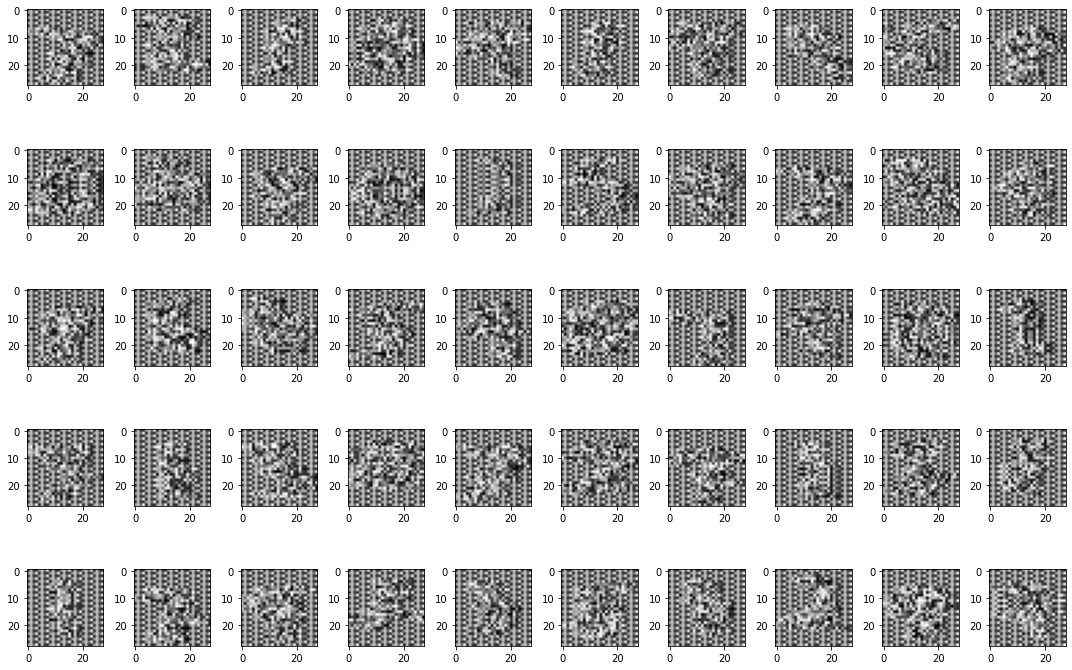

In [15]:
#Plotting Present Encrypted Dataset

num_row = 5
num_col = 10
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for i in range(50):
    ax1 = axes1[i // num_col, i % num_col]
    ax1.imshow(encrypted_present_test[i], cmap='gray')
plt.tight_layout()
plt.show()

In [16]:
with open('speck_test.pkl', 'rb') as f:
    encrypted_speck_test = pickle.load(f)

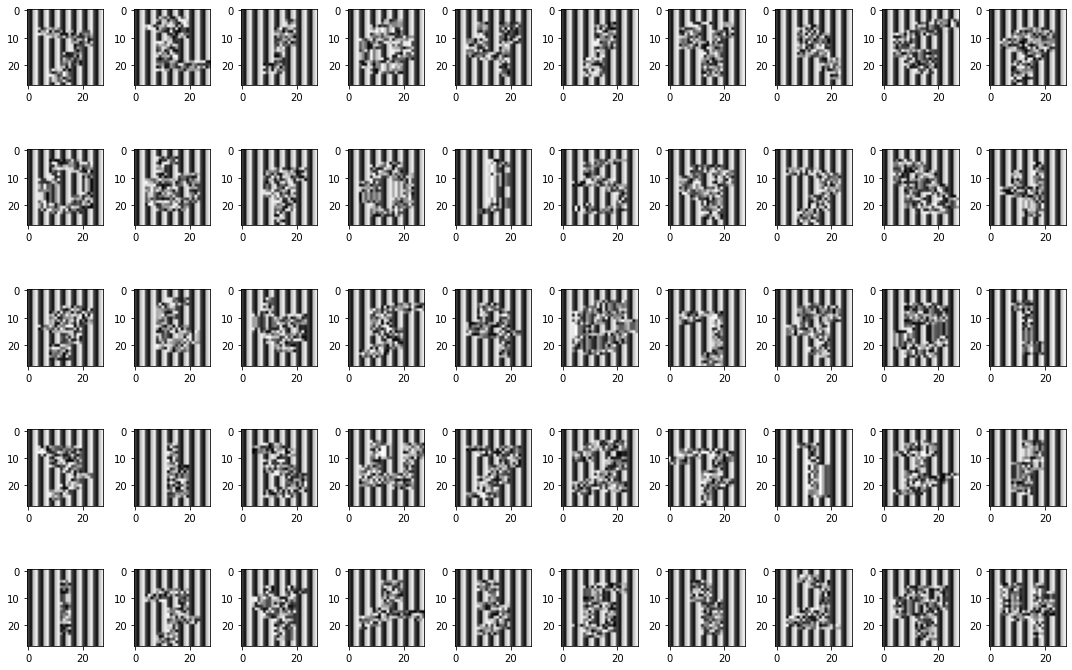

In [17]:
#Plotting Present Encrypted Dataset

num_row = 5
num_col = 10
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for i in range(50):
    ax1 = axes1[i // num_col, i % num_col]
    ax1.imshow(encrypted_speck_test[i], cmap='gray')
plt.tight_layout()
plt.show()

In [18]:
x_test = np.concatenate((encrypted_present_test, encrypted_speck_test))

In [19]:
#Creates y with value 0 for present
y_test = []
for i in range(len(encrypted_present_test)):
    y_test.append(0)

In [20]:
#Creates y with value 1 for speck
for i in range(len(encrypted_speck_test)):
    y_test.append(1)

In [21]:
#reshape x
xTest = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [22]:
#normalize xTest to (0 - 1)
test_norm = xTest.astype('float32')
test_norm = test_norm / 255.0

In [23]:
testY = to_categorical(y_test)

In [24]:
#Compiling Sequential model
from keras import Sequential

#SEQ model
model = Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Metal device set to: Apple M1 Pro


2022-07-09 11:49:17.769537: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-09 11:49:17.770121: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
#Fitting the model with validation data
model.fit(train_norm, trainY, batch_size=100, epochs=5, validation_data=(test_norm,testY))

Epoch 1/5


2022-07-09 11:49:31.061865: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


   1/1200 [..............................] - ETA: 7:25 - loss: 0.6867 - accuracy: 0.5100

2022-07-09 11:49:31.290998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1196/1200 [============================>.] - ETA: 0s - loss: 0.0085 - accuracy: 0.9984

2022-07-09 11:49:45.724561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1200/1200 [==============================] - 16s 13ms/step - loss: 0.0084 - accuracy: 0.9984 - val_loss: 0.7569 - val_accuracy: 0.6061
Epoch 2/5
1200/1200 [==============================] - 15s 12ms/step - loss: 1.3714e-05 - accuracy: 1.0000 - val_loss: 0.9091 - val_accuracy: 0.5850
Epoch 3/5
1200/1200 [==============================] - 14s 12ms/step - loss: 4.3506e-06 - accuracy: 1.0000 - val_loss: 0.7420 - val_accuracy: 0.6335
Epoch 4/5
1200/1200 [==============================] - 14s 11ms/step - loss: 0.0098 - accuracy: 0.9985 - val_loss: 1.0260 - val_accuracy: 0.5775
Epoch 5/5
1200/1200 [==============================] - 13s 11ms/step - loss: 1.3339e-05 - accuracy: 1.0000 - val_loss: 0.6212 - val_accuracy: 0.7073


In [26]:
#Configuration of each layer
print("Config of each layers")
count_config = 1

for layer in model.layers:
    print("\nConfig of layer", count_config, ":")
    for key, value in layer.get_config().items():
        print("\t", key, ":", value)
    count_config = count_config + 1

Config of each layers

Config of layer 1 :
	 name : conv2d
	 trainable : True
	 batch_input_shape : (None, 28, 28, 1)
	 dtype : float32
	 filters : 32
	 kernel_size : (5, 5)
	 strides : (1, 1)
	 padding : valid
	 data_format : channels_last
	 dilation_rate : (1, 1)
	 groups : 1
	 activation : relu
	 use_bias : True
	 kernel_initializer : {'class_name': 'GlorotUniform', 'config': {'seed': None}}
	 bias_initializer : {'class_name': 'Zeros', 'config': {}}
	 kernel_regularizer : None
	 bias_regularizer : None
	 activity_regularizer : None
	 kernel_constraint : None
	 bias_constraint : None

Config of layer 2 :
	 name : max_pooling2d
	 trainable : True
	 dtype : float32
	 pool_size : (2, 2)
	 padding : valid
	 strides : (2, 2)
	 data_format : channels_last

Config of layer 3 :
	 name : conv2d_1
	 trainable : True
	 dtype : float32
	 filters : 64
	 kernel_size : (5, 5)
	 strides : (1, 1)
	 padding : valid
	 data_format : channels_last
	 dilation_rate : (1, 1)
	 groups : 1
	 activation : relu

In [27]:
#Weights assigned to each layer
print("Weights of each layers")
count_weight = 1
for layer in model.layers:
    print("Weight", count_weight, ":", layer.get_weights(), "\n")
    count_weight = count_weight + 1

Weights of each layers
Weight 1 : [array([[[[ 8.59345645e-02,  2.73143779e-02,  8.81093182e-03,
          -8.95804837e-02,  2.74562538e-02,  4.05770056e-02,
           5.46168536e-02, -2.64069121e-02,  7.70340394e-03,
          -2.83388607e-02, -7.69854039e-02,  4.47183698e-02,
           1.58024225e-02,  4.37885225e-02, -5.97709185e-03,
           4.44066413e-02, -1.76122501e-01,  7.48175159e-02,
           1.27592713e-01, -2.76291501e-02, -2.05639508e-02,
          -2.62272172e-02,  3.30157988e-02, -9.68663841e-02,
          -1.42568517e-02, -1.48587930e-03, -3.98145951e-02,
           1.67505331e-02,  3.46593931e-02, -8.73602703e-02,
          -9.93643329e-02, -8.14487413e-02]],

        [[ 4.28377166e-02, -1.79606453e-02,  3.09408940e-02,
           9.12723765e-02, -9.65020731e-02,  1.63851101e-02,
           4.44069318e-02,  1.05519444e-01, -1.73011720e-02,
          -5.87838143e-02,  2.37768609e-02,  5.59814274e-02,
          -8.52514654e-02, -6.29034564e-02, -3.60338241e-02,
   

In [28]:
#List of each layers
layer_dict = dict([(layer.name, layer) for layer in model.layers])

#Computing activation for each layer for a fixed input of 1's of dimension 28x28
count = 1
for i in layer_dict:
    print("Layer", count, ":", i)
    input_tensor = model.input
    layer_output = layer_dict[i].output
    func = K.function([input_tensor], [layer_output])
    image = np.ones((28,28,1))
    activation = func([image[np.newaxis, :, :, :]])
    print("Layer", count, "activation: ", activation)
    count = count + 1

    # activation

Layer 1 : conv2d
Layer 1 activation:  [array([[[[0.        , 0.        , 0.        , ..., 0.0149517 ,
          0.        , 0.02387739],
         [0.        , 0.        , 0.        , ..., 0.0149517 ,
          0.        , 0.02387739],
         [0.        , 0.        , 0.        , ..., 0.0149517 ,
          0.        , 0.02387739],
         ...,
         [0.        , 0.        , 0.        , ..., 0.0149517 ,
          0.        , 0.02387739],
         [0.        , 0.        , 0.        , ..., 0.0149517 ,
          0.        , 0.02387739],
         [0.        , 0.        , 0.        , ..., 0.0149517 ,
          0.        , 0.02387739]],

        [[0.        , 0.        , 0.        , ..., 0.0149517 ,
          0.        , 0.02387739],
         [0.        , 0.        , 0.        , ..., 0.0149517 ,
          0.        , 0.02387739],
         [0.        , 0.        , 0.        , ..., 0.0149517 ,
          0.        , 0.02387739],
         ...,
         [0.        , 0.        , 0.        , ...

In [29]:
#Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 2)                 2

In [30]:
#Validating again using test data - x (normalised) vs testY ()
score = model.evaluate(test_norm, testY)
print('loss=', score[0])
print('accuracy=', score[1])

 17/625 [..............................] - ETA: 4s - loss: 9.2187e-06 - accuracy: 1.0000

2022-07-09 11:52:19.172785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 4s 6ms/step - loss: 0.6212 - accuracy: 0.7073
loss= 0.6212013363838196
accuracy= 0.7073000073432922


In [31]:
#getting prediction of test data against the test_norm (normalised test) data
predictions = model.predict(test_norm)

 55/625 [=>............................] - ETA: 1s

2022-07-09 11:52:31.183340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 2s 2ms/step


In [32]:
#Converting categorical value to numeric value
predictions_numeric = np.argmax(predictions, axis=-1)
testY_numeric = np.argmax(testY, axis=-1)

In [96]:
#Confusion matrix
confusion_matrix(testY_numeric, predictions_numeric)

array([[10000,     0],
       [ 1342,  8658]])